# Slicing DataFrames, indexing, altering columns, and merging

Firstly, let's load the dataframe of height, weight, etc... which we created in the previous notebook (i.e. the ``'height_weight.csv'`` file), assign to a variable named ``df``, and print that variable to check that it looks correct:

In [3]:
import pandas as pd
df=pd.read_csv('Documents/DataScience/3_pandas1/height_weight.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/DataScience/3_pandas1/height_weight.csv'

## Slicing with ``.loc`` and ``.iloc``

Selecting particular rows and columns from a DataFrame is referred to as "slicing". We can use ``.loc[index_label, column_label]`` to slice by label:

In [ ]:
# Row 2, "height" column
df.loc[2, 'height']

In [ ]:
# All rows from 1 to 3, and the "height" column
df.loc[1:3, 'height']

In [ ]:
# Last rows from the 2nd row (i.e. "2:" means from the 2nd row until the last row), all columns
df.loc[2:]

In [ ]:
# Select only the initial rows up to the 3rd row, and the "name" and "weight" columns
sub_df = df. # Your code here...

print(sub_df)
assert sub_df.shape == (4, 2), 'sub_df has incorrect shape. You may have selected the wrong rows and/or columns.'

## Modifying the index

Recall that we can select rows corresponding to a given person using:

In [ ]:
df[df['name'] == 'Dinesh']

However, we can change the index to one of the columns in the DataFrame:

In [ ]:
df.set_index('name', inplace=True)
print(df)

This might be a more suitable index for this particular dataset. The ``.loc`` indexing would now be performed by name:

In [ ]:
# This line no longer works
df.loc[2, 'height']  # Change this line to work with the new index

Note that the new index makes it a little simpler to obtain each person's data, as the syntax is a little more concise:

In [ ]:
df.loc['Dinesh']

However, if we want to slice by position, we now have to use ``.iloc[position]`` to do so:

In [ ]:
# 0th row, all columns
df.iloc[0]

In [ ]:
# Initial rows up to 1st row, and the "height" column (which is now the 0th column)
df.iloc[:2, 0]

In [ ]:
# All rows, all columns
df.iloc[:]

Note that the above line is equivalent to the following:

In [ ]:
# All rows, all columns
df

We can also reset the index to an auto-incrementing number:

In [ ]:
df.reset_index(inplace=True)
print(df)

## Adding and altering columns

We can add a column to a DataFrame like so:

In [ ]:
df['age'] = [39, 43, 25, 68, 20, 72]

print(df)

Now use the cell below to create a new column called ``last_name`` which contains each person's last name (just make up some last names).

In [ ]:
Your code here...

Note that we can change column names using the ``.rename()`` , method:

In [ ]:
df.rename(columns={'name': 'first_name',
                   'height': 'height (cm)',
                   'weight': 'weight (kg)'})

We can also combine data from different columns into a new column. For example, let's create a new column for the full name of each person in the table:

In [ ]:
df['full_name'] = df['first_name'] + df['last_name']
print(df)

Note that the new ``full_name`` column does not contain any whitespace between the two names, because we simply concatenated the two columns using the ``+`` operator. See if you can re-create the ``full_name`` column in the code cell below, but this time include a single whitespace character between the two names:

In [ ]:
df['full_name'] = # Your code here
print(df)

You can also use the ``.apply()`` method to apply a function to all entries in a column.

In [ ]:
# Create new column containing number of characters in each person's full_name
df['full_name_len'] = df['full_name'].apply(len)
print(df)

This applies the inbuilt Python function ``len()`` to each ``full_name`` entry, and assigns the returned Series to a new column.

## Exercise 2

Now, in the below cell, use the ``.apply()`` method together with the ``upper()`` function to print the ``'first_name'`` column in upper case letters. Note that you will need to pass a lambda function to the ``.apply()`` method:

In [ ]:
Your code here...

Now again print the ``'first_name'`` column in upper case letters, but this time use the ``.str.upper()`` method:

In [ ]:
Your code here...

Note that there are several ``.str.<method_name>()`` methods that are useful for manipulating string (object) columns in Pandas DataFrames. For example, try using the ``.str.contains()`` method to check whether each string in the ``'first_name'`` column contains a sub-string of your choice:

In [ ]:
Your code here...

Now use the above condition to query the ``df`` DataFrame (i.e. print the associated rows that satisfy the above query):

In [ ]:
Your code here...

Now create a new column called ``year_of_birth`` containing each person's year of birth, which can be inferred from their current age:

In [ ]:
Your code here...

## Merging DataFrames

We can join different datasets together in Pandas using ``pd.merge()``.

To provide an example of this, there should be a CSV file named "income.csv" in the same folder as this notebook, which contains the income for some of the people present in the above DataFrame ``df``.

Let's first import the data from "income.csv" into a new DataFrame called ``income``:

In [ ]:
# Your code here...

We can now join this income data to our previous dataframe:

In [ ]:
# This joins "df" to "income" by matching the "first_name" column
merged = pd.merge(df, income, on='first_name')
print(merged)

In [ ]:
merged

Note that only the two people that are present in both ``df`` and ``income`` appear in the resulting ``merged`` dataframe. This is because the default join type in ``pd.merge()`` is an INNER join. Here is a diagram showing how different join methods work when joining two tables (called "zoo" and "zoo_eats"):

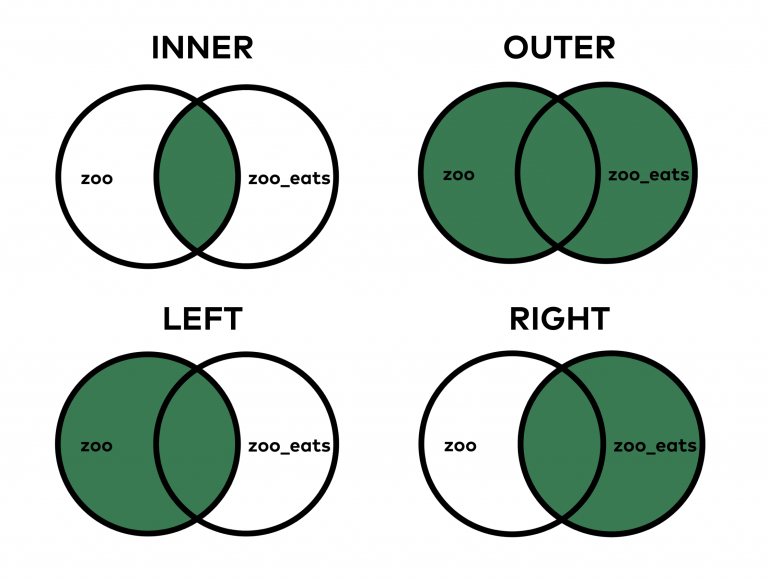

Image credit: https://data36.com/pandas-tutorial-3-important-data-formatting-methods-merge-sort-reset_index-fillna/

For example, a table produced by an INNER join will only have rows where values in the joining columns are present in both tables, whereas a table produced by a LEFT join will keep all rows of the left table.

We can change the join type to a LEFT join by specifying the ``how`` option when calling ``pd.merge()``:

In [ ]:
merged = pd.merge(df, income, on='first_name', how='left')
print(merged)

This keeps all of the rows in the left table (``df``) and fills all missing data in the new column with ``NaN``s.

Note that if the column names that we want to join on are different, we can specify this when calling ``pd.merge()``. For example, let's take in some data of whether or not people have a PhD:

In [ ]:
phd = pd.read_csv('phd.csv')
print(phd)

and merge it with the rest of the data:

In [ ]:
all_data = pd.merge(merged, income, left_on='first_name', right_on='name', how='left')
print(all_data)

## Exercise 3

A person's Body Mass Index (BMI) can be calculated using the equation:

$BMI = {w \over h^2}$

where $w$ = *weight (kg)* and $h$ = *height (m)*. Since the height must be in units of metres, not centimetres, we first need to create a new column which contains the height converted to metres.

Now see if you can create a new column for the height in units of metres (rather than centimetres), and use it to calculate the BMI:

In [ ]:
# Calculate height in metres
Your code here...



# Calculate BMI
df['bmi (kg/m^2)'] = # Your code here...



# This line checks that your calculated BMI values seem correct
assert df['bmi (kg/m^2)'].dropna().between(10, 50).all(), 'You may have mis-calculated the BMI values, as they seem to be outside of a realistic range'

Now join the ``df`` table with the ``income`` and ``phd`` tables, so that all of the data we have on the above five people is stored in a single table:

In [ ]:
Your code here...